# Goal

The goal of telecom firms is to lower customer churn and keep highly profitable customers.

Using the information (features) from the first three months, forecast the turnover in the most recent (i.e., ninth) month.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# Understanding & Preparing Data

In [2]:
# Reading the dataset
raw_data = pd.read_csv('telecom_churn_data.csv')
raw_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
print(f"Shape of data : {raw_data.shape}")

Shape of data : (99999, 226)


In [4]:
#checking the datatypes of each column
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
#lets check some stats on the raw data
raw_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Missing Value Treatment

In [6]:
#check the % of missing values in each available columns in the data set
raw_data_null_cols = np.round(((raw_data.isnull().sum()/raw_data.shape[0])*100),2).sort_values(ascending = False)
raw_data_null_cols.head()

arpu_3g_6            74.85
night_pck_user_6     74.85
total_rech_data_6    74.85
arpu_2g_6            74.85
max_rech_data_6      74.85
dtype: float64

In [7]:
print(f"No. of columns found with missing values : {len(raw_data_null_cols[raw_data_null_cols>0])}")
print(f"No. of columns found with missing values > 30% : {len(raw_data_null_cols[raw_data_null_cols>30])}")

No. of columns found with missing values : 166
No. of columns found with missing values > 30% : 40


* We need to drop those 40 columns whose missing values % is greater than 30, since these are of no use to us for analysis as majority portion of data is missing.

In [8]:
#cols with more than 30% null values
cols_with_ge_30_missing = raw_data_null_cols[raw_data_null_cols>30].index

#dropping the columns with missing values greater than 30%
raw_data1 = raw_data.drop(columns = cols_with_ge_30_missing)

In [9]:
print(f"Shape of new data set : {raw_data1.shape}")

Shape of new data set : (99999, 186)


## Removing pointless columns

### Date columns

* Date columns are being removed because they are not necessary for our research.

In [10]:
date_cols = [col for col in raw_data1.columns if 'date' in col]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [11]:
#dropping the date columns and making another version of raw data
raw_data2 = raw_data1.drop(columns = date_cols)

In [12]:
print(f"Shape of new data set : {raw_data2.shape}")

Shape of new data set : (99999, 178)


### Circle_id

In [13]:
#dropping the circle_id column and making another version of raw data
raw_data3 = raw_data2.drop(columns = 'circle_id')

In [14]:
print(f"Shape of new data set : {raw_data3.shape}")

Shape of new data set : (99999, 177)


## Filter High Value Customers

* *avg_rech_amt_6_7* : Average of aggregated total recharge amount of month6, 7

In [15]:
#creating the new column
raw_data3['avg_rech_amt_6_7'] = (raw_data3['total_rech_amt_6']+raw_data3['total_rech_amt_7'])/2

In [16]:
#find the 70th percentile and then filter the customers who are above this 70%ile
X = raw_data3['avg_rech_amt_6_7'].quantile(0.7)
print(f"70th percentile of recharge amount : {X}")

70th percentile of recharge amount : 368.5


In [17]:
#filtering the customers who are above 70th %ile
raw_data4 = raw_data3[raw_data3['avg_rech_amt_6_7'] >= X]
raw_data4.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [18]:
print(f"Shape of new data set : {raw_data4.shape}")

Shape of new data set : (30011, 178)


* As stated in the instructions of case study, there are *30K* rows of high value customers' data.

## Checking for Other Missing values in the final dataset if any

In [19]:
#dropping the rows that have missing values altogether
raw_data5 = raw_data4.dropna()

In [20]:
print(f"Shape of new data set : {raw_data5.shape}")

Shape of new data set : (27991, 178)


* While dropping rows with missing values, we lost about *7%* of the data. But that's okay because we have a lot of data to deal with.

## Tag Churners & Remove attributes of churn phase

Condition for Tagging as Churn based on fourth month:
* Customers who have not made calls, either incoming or outgoing.
* Customers who have not userd mobile internet even once in the churn phase.

In [21]:
#creating a new column churn based on above conditions
raw_data5['churn'] = np.where((raw_data5['total_ic_mou_9']==0) & (raw_data5['vol_2g_mb_9']==0) & (raw_data5['vol_3g_mb_9']==0), 1, 0)

In [22]:
#deleting all the attributes corresponding to the churn phase customers
cols_to_delete_9 = [col for col in raw_data5.columns if '_9' in col]
print(f"Columns to drop : {len(cols_to_delete_9)}")

Columns to drop : 42


In [23]:
#dropping the columns correspond to the churn phase
raw_data6 = raw_data5.drop(columns = cols_to_delete_9)

In [24]:
print(f"Shape of new data set : {raw_data6.shape}")

Shape of new data set : (27991, 137)


## Churn percentage

In [25]:
raw_data6['churn'].value_counts(normalize=True)*100

0    96.323818
1     3.676182
Name: churn, dtype: float64

* As mentioned in the case study instructions, there's a churn rate of *3.7%*
* This clearly shows the class imbalance and we'll handle this issue while building the models.

## Outlier Treatment

In [26]:
raw_data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 137 entries, mobile_number to churn
dtypes: float64(110), int32(1), int64(26)
memory usage: 29.4 MB


* Notice that all the columns are numerical columns except *mobile_number* & *churn* columns.
* *churn* is a categorical variable where as *mobile_number* acts a an index to identify the customers.

In [27]:
# Removing outliers below 10th and above 90th percentile
num_cols = [col for col in raw_data6.columns if col not in ['mobile_number', 'churn']]

for col in num_cols: 
    q1 = raw_data6[col].quantile(0.10)
    q3 = raw_data6[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = raw_data6.loc[(raw_data6[col] > range_low) & (raw_data6[col] < range_high)]

raw_data7 = data.copy()

In [28]:
print(f"Shape of new data set : {raw_data7.shape}")

Shape of new data set : (27705, 137)


# Feature Engineering

## mou_action_drop

**mou_action_drop** : Denotes whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [29]:
# Total mou at good phase incoming and outgoing
raw_data7['total_mou_good'] = (raw_data7['total_og_mou_6'] + raw_data7['total_ic_mou_6'])

# Avg. mou at action phase
# Taking average as there are two months(7 and 8) in action phase
raw_data7['avg_mou_action'] = (raw_data7['total_og_mou_7'] + raw_data7['total_og_mou_8'] + raw_data7['total_ic_mou_7'] + raw_data7['total_ic_mou_8'])/2

# Difference of avg_mou_good and avg_mou_action
raw_data7['diff_mou'] = raw_data7['avg_mou_action'] - raw_data7['total_mou_good']

# Checking if the mou has decreased in action phase
raw_data7['mou_action_drop'] = np.where((raw_data7['diff_mou'] < 0), 1, 0)

In [30]:
raw_data7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,mou_action_drop
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,0.00,0.00,0.0,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,0.00,2.45,21.89,0.0,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,0.00,0.00,0.0,408.0,0,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,0.00,0.00,0.0,640.0,0,1067.43,1245.130,177.700,0


## rech_num_action_drop

**rech_num_action_drop** : Denotes whether the number of times the customer has recharged has decreased in the action phase than the good phase.

In [31]:
# Avg rech number at action phase
raw_data7['avg_rech_num_action'] = (raw_data7['total_rech_num_7'] + raw_data7['total_rech_num_8'])/2

# Difference total_rech_num_6 and avg_rech_action
raw_data7['diff_rech_num'] = raw_data7['avg_rech_num_action'] - raw_data7['total_rech_num_6']

# Checking if rech_num has decreased in action phase
raw_data7['rech_num_action_drop'] = np.where((raw_data7['diff_rech_num'] < 0), 1, 0)

In [32]:
raw_data7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,mou_action_drop,avg_rech_num_action,diff_rech_num,rech_num_action_drop
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.0,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,0.0,459.0,0,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.0,408.0,0,1341.41,1.560,-1339.850,1,3.0,-16.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.0,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0


## rech_amt_action_drop

**rech_amt_action_drop** : Denotes whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [33]:
# Avg rech_amt in action phase
raw_data7['avg_rech_amt_action'] = (raw_data7['total_rech_amt_7'] + raw_data7['total_rech_amt_8'])/2

# Difference of action phase rech amt and good phase rech amt
raw_data7['diff_rech_amt'] = raw_data7['avg_rech_amt_action'] - raw_data7['total_rech_amt_6']

# Checking if rech_amt has decreased in action phase
raw_data7['rech_amt_action_drop'] = np.where((raw_data7['diff_rech_amt'] < 0), 1, 0) 

In [34]:
raw_data7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,avg_mou_action,diff_mou,mou_action_drop,avg_rech_num_action,diff_rech_num,rech_num_action_drop,avg_rech_amt_action,diff_rech_amt,rech_amt_action_drop
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1341.41,1.560,-1339.850,1,3.0,-16.0,1,15.0,-801.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0


## arpu_action_drop

**arpu_action_drop** : Denotes whether the average revenue per customer has decreased in the action phase than the good phase.

In [35]:
# ARUP in action phase
raw_data7['avg_arpu_action'] = (raw_data7['arpu_7'] + raw_data7['arpu_8'])/2

# Difference of good and action phase ARPU
raw_data7['diff_arpu'] = raw_data7['avg_arpu_action'] - raw_data7['arpu_6']

# Checking whether the arpu has decreased on the action month
raw_data7['arpu_action_drop'] = np.where(raw_data7['diff_arpu'] < 0, 1, 0)

In [36]:
raw_data7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,mou_action_drop,avg_rech_num_action,diff_rech_num,rech_num_action_drop,avg_rech_amt_action,diff_rech_amt,rech_amt_action_drop,avg_arpu_action,diff_arpu,arpu_action_drop
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0


## vbc_action_drop

**vbc_action_drop** : Denotes whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [37]:
# VBC in action phase
raw_data7['avg_vbc_3g_action'] = (raw_data7['jul_vbc_3g'] + raw_data7['aug_vbc_3g'])/2

# Difference of good and action phase VBC
raw_data7['diff_vbc'] = raw_data7['avg_vbc_3g_action'] - raw_data7['jun_vbc_3g']

# Checking whether the VBC has decreased on the action month
raw_data7['vbc_action_drop'] = np.where(raw_data7['diff_vbc'] < 0 , 1, 0)

In [38]:
raw_data7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,rech_num_action_drop,avg_rech_amt_action,diff_rech_amt,rech_amt_action_drop,avg_arpu_action,diff_arpu,arpu_action_drop,avg_vbc_3g_action,diff_vbc,vbc_action_drop
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


# EDA

## Univariate Analysis

### mou_action_drop

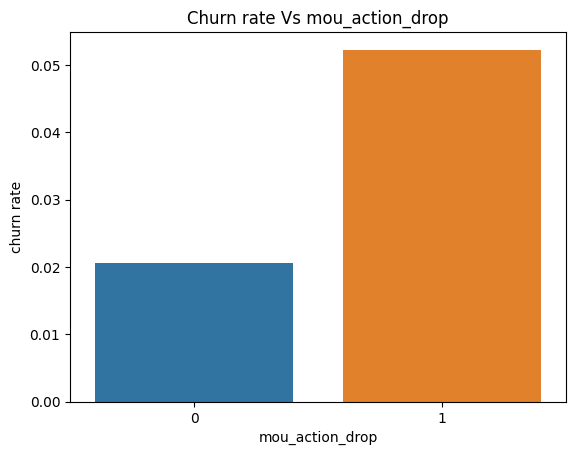

In [39]:
sns.barplot(data = raw_data7.pivot_table(values='churn', index='mou_action_drop', aggfunc='mean').reset_index(), x = 'mou_action_drop', y = 'churn')

plt.ylabel('churn rate')
plt.title('Churn rate Vs mou_action_drop')
plt.show()

**Deduction**
* Churn rate for the customers whose minutes of usage(mou) decreased in the action phase than the good phase is more.

### rech_num_action_drop

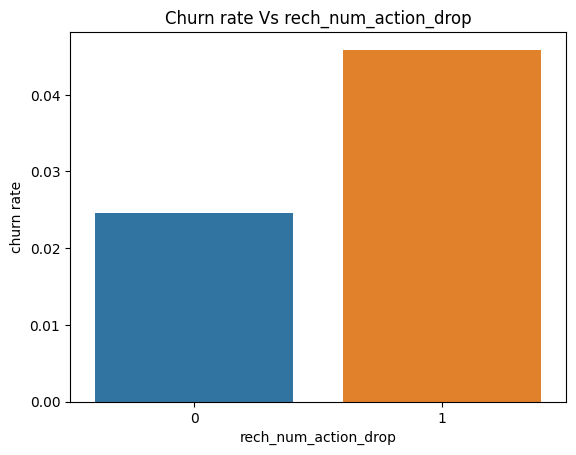

In [40]:
sns.barplot(data = raw_data7.pivot_table(values='churn', index='rech_num_action_drop', aggfunc='mean').reset_index(), x = 'rech_num_action_drop', y = 'churn')

plt.ylabel('churn rate')
plt.title('Churn rate Vs rech_num_action_drop')
plt.show()

**Deduction**
* The churn rate is higher for customers whose number of recharges during the action phase is lower than their number during the good phase, as is to be expected.

###  rech_amt_action_drop

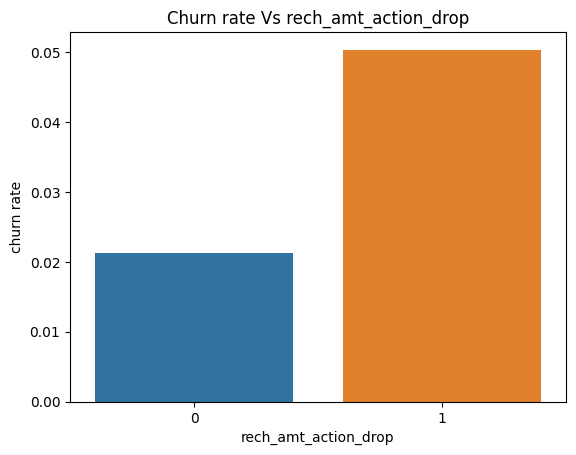

In [41]:
sns.barplot(data = raw_data7.pivot_table(values='churn', index='rech_amt_action_drop', aggfunc='mean').reset_index(), x = 'rech_amt_action_drop', y = 'churn')

plt.ylabel('churn rate')
plt.title('Churn rate Vs rech_amt_action_drop')
plt.show()

**Deduction**
* Here too, the same behavior is evident. Higher churn rates are associated with customers who recharge less frequently during the action phase than during the pleasant phase.

### vbc_action_drop

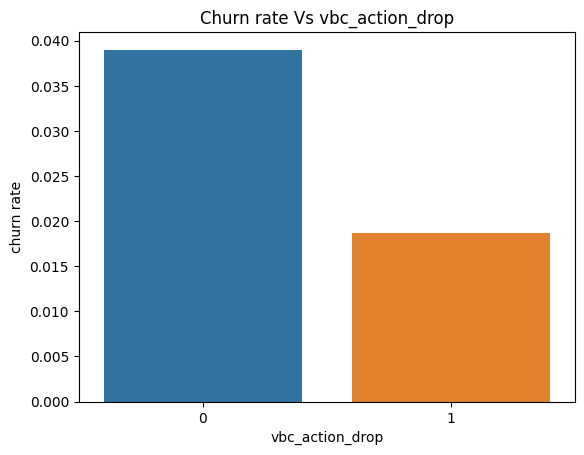

In [42]:
sns.barplot(data = raw_data7.pivot_table(values='churn', index='vbc_action_drop', aggfunc='mean').reset_index(), x = 'vbc_action_drop', y = 'churn')

plt.ylabel('churn rate')
plt.title('Churn rate Vs vbc_action_drop')
plt.show()

**Deduction**
* This is the anticipated outcome. Customers whose volume-based cost in action month is higher have higher churn rates. This indicates that even when they are in the action phase, customers do not increase their monthly recharge.

### avg_arpu_action

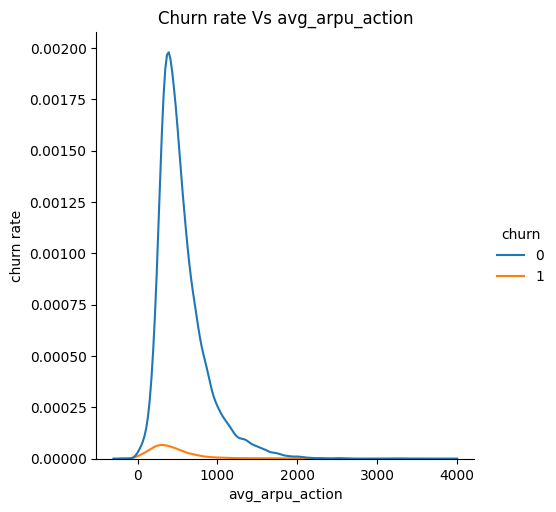

In [43]:
sns.displot(data = raw_data7, x = 'avg_arpu_action', hue = 'churn', kind = 'kde')

plt.ylabel('churn rate')
plt.title('Churn rate Vs avg_arpu_action')
plt.show()

**Deduction**
* The range of average revenue per user (ARPU) for churned customers is primarily 0 to 900. Customers with higher ARPU are less likely to leave the company.
* The range of ARPU for non-churned clients is primarily 0 to 1000.

### total_mou_good

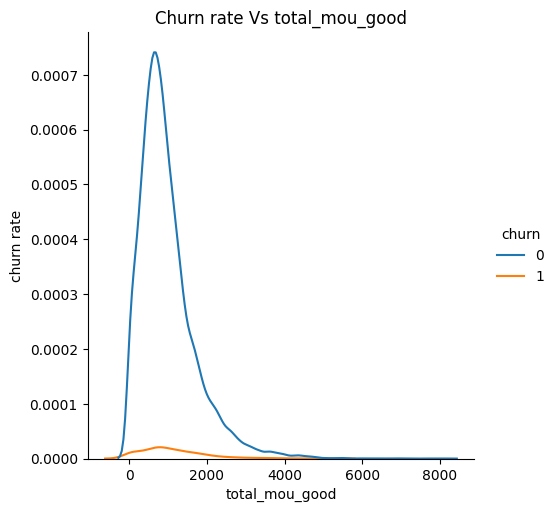

In [44]:
sns.displot(data = raw_data7, x = 'total_mou_good', hue = 'churn', kind = 'kde')

plt.ylabel('churn rate')
plt.title('Churn rate Vs total_mou_good')
plt.show()

**Deduction**
* The churn customers' minutes of usage (MOU) are primarily in the 0 to 2500 range. Less turnover is likely the stronger the MOU.

## Bivariate Analysis

### rech_amt_action_drop Vs rech_num_action_drop

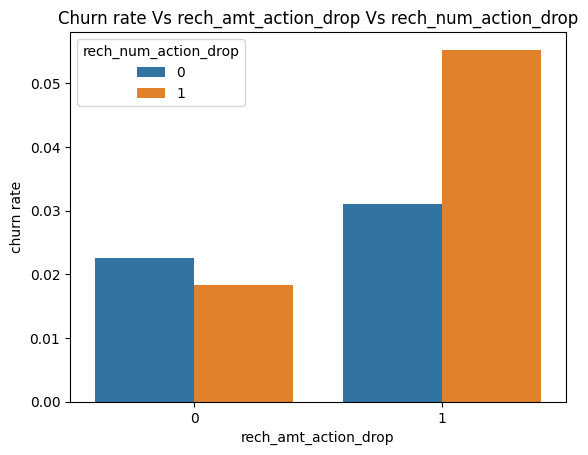

In [45]:
sns.barplot(data = raw_data7.groupby(by=['rech_amt_action_drop', 'rech_num_action_drop'], as_index = False).agg(churn_rate = ('churn', 'mean')), x = 'rech_amt_action_drop', y = 'churn_rate', hue = 'rech_num_action_drop')

plt.ylabel('churn rate')
plt.title('Churn rate Vs rech_amt_action_drop Vs rech_num_action_drop')
plt.show()

**Deduction**
* The accompanying graph demonstrates that consumers with lower recharge amounts and/or fewer recharges in the action phase compared to the good phase have higher churn rates.

### rech_amt_action_drop Vs vbc_action_drop

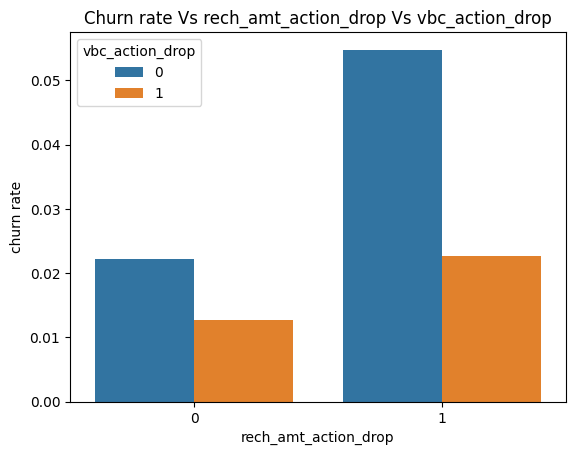

In [46]:
sns.barplot(data = raw_data7.groupby(by=['rech_amt_action_drop', 'vbc_action_drop'], as_index = False).agg(churn_rate = ('churn', 'mean')), x = 'rech_amt_action_drop', y = 'churn_rate', hue = 'vbc_action_drop')

plt.ylabel('churn rate')
plt.title('Churn rate Vs rech_amt_action_drop Vs vbc_action_drop')
plt.show()

**Deduction**
* We can see that the churn rate is higher in this instance as well for consumers whose recharge amounts are reduced as the volume-based costs rise during the action month.

### avg_rech_num_action Vs avg_rech_amt_action

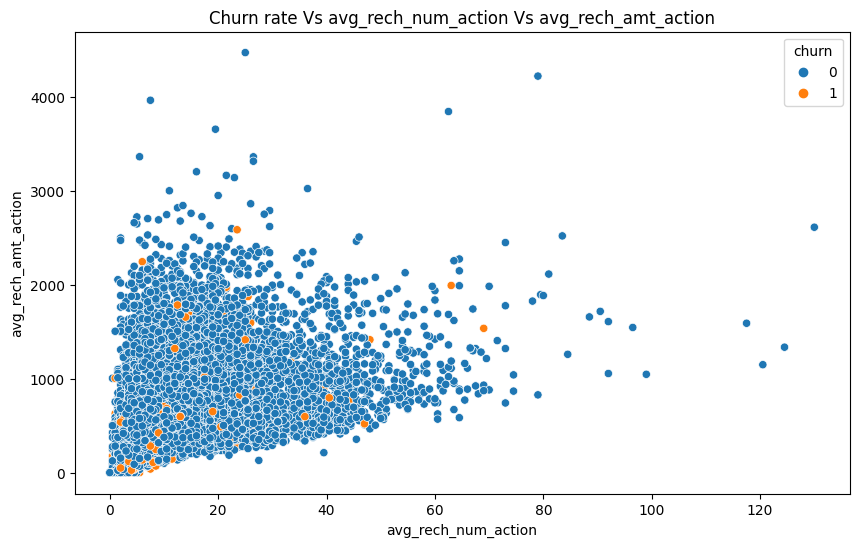

In [47]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x = 'avg_rech_num_action', y = 'avg_rech_amt_action', hue='churn', data=raw_data7)

#plt.ylabel('churn rate')
plt.title('Churn rate Vs avg_rech_num_action Vs avg_rech_amt_action')
plt.show()

**Deduction**
* The pattern shown above demonstrates that the recharge quantity and amount are mostly propotional. The amount of the recharge increases with the number of recharges.

### Dropping the derived columns that are not required further

In [48]:
raw_data8 = raw_data7.drop(columns = ['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'])

# Data Preprocessing Techniques

## Splitting the data into train & test datasets

In [49]:
#storing independant variables in X
X = raw_data8.drop(columns = ['mobile_number', 'churn'])

#storing dependent variable in y
y = raw_data8['churn']

# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [50]:
#logistic regression model or a model from the tree family to identify important predictors
#In the case of logistic regression, make sure to handle multicollinearity.

## Dealing with Class imbalance

* By performing upsampling with SMOTE, we are producing synthetic samples (Synthetic Minority Oversampling Technique).

In [51]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

# Fitting SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

## Feature Scaling

### Scaling the train set

In [52]:
# Instantiate the Scaler
scaler = StandardScaler()

numeric_cols = ['mou_action_drop', 'rech_num_action_drop', 'rech_amt_action_drop', 'arpu_action_drop', 'vbc_action_drop']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

In [53]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,mou_action_drop,rech_num_action_drop,rech_amt_action_drop,arpu_action_drop,vbc_action_drop
0,0.0,0.0,0.0,616.869,395.590,315.870,436.71,24.69,38.48,340.59,...,796,5.65,0.00,104.88,0.00,0.883512,0.863025,0.842877,0.855904,3.535802
1,0.0,0.0,0.0,137.752,1903.551,1555.414,55.08,236.09,222.04,75.66,...,428,0.00,0.00,0.00,0.00,-1.131846,-1.158714,-1.186412,-1.168356,-0.282821
2,0.0,0.0,0.0,505.791,720.279,696.945,83.64,55.93,92.09,269.21,...,2454,1023.28,891.46,555.54,13.06,0.883512,-1.158714,-1.186412,-1.168356,-0.282821
3,0.0,0.0,0.0,295.440,811.371,669.625,33.26,30.46,41.39,69.23,...,290,0.00,0.00,0.00,0.00,-1.131846,-1.158714,-1.186412,-1.168356,-0.282821
4,0.0,0.0,0.0,656.768,630.267,853.989,205.78,264.01,269.46,861.38,...,660,0.00,0.00,0.00,0.00,-1.131846,-1.158714,-1.186412,-1.168356,-0.282821


### Scaling the test set

In [54]:
# Transform the test set
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,mou_action_drop,rech_num_action_drop,rech_amt_action_drop,arpu_action_drop,vbc_action_drop
5704,0.0,0.0,0.0,648.504,472.943,766.030,21.76,10.71,34.16,666.43,...,1299,78.66,138.76,0.00,21.37,-1.131846,-1.158714,0.842877,0.855904,-0.282821
64892,0.0,0.0,0.0,588.630,317.367,357.411,17.38,6.81,23.98,271.48,...,1640,769.51,790.90,1735.16,0.00,0.883512,0.863025,0.842877,0.855904,3.535802
39613,0.0,0.0,0.0,740.525,610.988,905.574,115.63,94.48,141.49,765.56,...,3651,0.00,0.00,0.00,0.00,0.883512,0.863025,0.842877,-1.168356,-0.282821
93118,0.0,0.0,0.0,769.870,803.561,338.784,354.21,368.49,161.79,370.14,...,2601,0.00,0.00,0.00,0.00,0.883512,-1.158714,0.842877,0.855904,-0.282821
81235,0.0,0.0,0.0,1758.989,832.493,1376.718,2437.71,1075.26,1341.73,438.41,...,896,0.00,0.00,0.00,0.00,0.883512,0.863025,0.842877,0.855904,-0.282821


## Feature selection with PCA

In [55]:
#Import PCA
from sklearn.decomposition import PCA

In [56]:
# Instantiate PCA
pca = PCA(random_state=36)

# Fit train set on PCA
pca.fit(X_train)

# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.28172482 0.42181425 0.52189174 0.6159478  0.6956118  0.75557255
 0.79183299 0.81985812 0.84379708 0.86166205 0.87869974 0.8911985
 0.9023493  0.91286306 0.92197769 0.92972027 0.9367146  0.94323157
 0.94906071 0.95413702 0.95837642 0.96204808 0.96564834 0.96908462
 0.97212319 0.97492082 0.97711705 0.97924737 0.98101525 0.98269777
 0.98417786 0.98563872 0.98700024 0.98827857 0.98939621 0.99043448
 0.99139669 0.99226323 0.9929491  0.99361955 0.99420709 0.99475715
 0.99527654 0.99578653 0.99626472 0.99667883 0.99705852 0.99740659
 0.99771032 0.99800755 0.99826852 0.99850046 0.99871643 0.99886994
 0.99902095 0.99915217 0.99927819 0.99938026 0.99945204 0.99952103
 0.99958879 0.99965438 0.9997078  0.99974812 0.99978283 0.99981282
 0.9998404  0.9998656  0.99988705 0.99990561 0.99991667 0.99992705
 0.99993708 0.99994681 0.99995412 0.99996016 0.99996611 0.9999712
 0.99997611 0.99997969 0.99998306 0.99998628 0.99998927 0.99999215
 0.99999404 0.9999957  0.99999671 0.99999745 0.99999804 0.999998

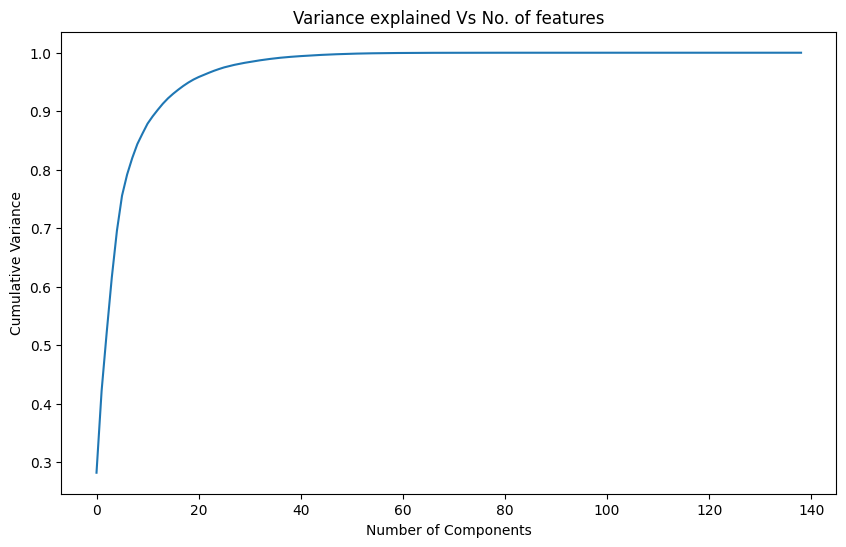

In [57]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.title('Variance explained Vs No. of features')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

plt.show()

**Deduction**
* We can observe that `40 components` account for almost 90% of the data's variation. Thus, we will run PCA on 40 components.

### PCA with 40 components

In [58]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [59]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=40)

# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

#Applying the transformation on the test set
X_test_pca = pca_final.transform(X_test)

* In the test set, we just do transform; fit-transform is not performed. because the train set's fitting has already been completed. So, using the train set's already-fitted data, we simply need to do the transformation.

**Emphasize Sensitivity/Recall than Accuracy**
* Higher Sensitivity/Recall scores are more important to us than accuracy.
* So we should give churn cases greater attention than non-churn ones. Retaining consumers who have the potential to leave is the main objective. If we count a few non-churning customers as churning and offer them certain incentives to keep them, there shouldn't be a problem. So, the sensitivity score is more significant in this case.

# Model Building using various techniques and Selection

## Logistic Regression with PCA

In [60]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

### Hyperparameter Tuning : C

* In Logistic Regression, C is the inverse of regularisation strength. Less regularisation is correlated with higher levels of C.

In [61]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# specifying the score as recall since we want to achieve a better sensitivity than accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [62]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.014241,0.092953,0.017355,0.015116,0.01,{'C': 0.01},0.902682,0.908686,0.904929,0.900699,...,0.904630,0.002761,2,0.905231,0.904968,0.903507,0.905390,0.901964,0.904212,0.001307
1,0.914665,0.032223,0.010120,0.001827,0.1,{'C': 0.1},0.902920,0.904472,0.899323,0.901399,...,0.902761,0.002246,6,0.904881,0.903564,0.899994,0.905448,0.902199,0.903217,0.001964
2,0.874754,0.036022,0.010337,0.001017,1,{'C': 1},0.903869,0.907048,0.903060,0.900699,...,0.904166,0.002262,4,0.905756,0.903622,0.901048,0.904804,0.901671,0.903380,0.001794
3,0.847246,0.020570,0.008509,0.000989,10,{'C': 10},0.902920,0.909155,0.903527,0.899767,...,0.904119,0.003076,5,0.905698,0.905846,0.902278,0.905038,0.900557,0.903883,0.002103
4,0.844270,0.050828,0.008294,0.001032,100,{'C': 100},0.903632,0.907048,0.903527,0.900466,...,0.904444,0.002598,3,0.905814,0.903271,0.902336,0.905331,0.904016,0.904154,0.001284
5,0.826310,0.038416,0.008990,0.001562,1000,{'C': 1000},0.904344,0.907516,0.903994,0.901399,...,0.904682,0.002077,1,0.905756,0.903154,0.902395,0.905155,0.902082,0.903708,0.001481


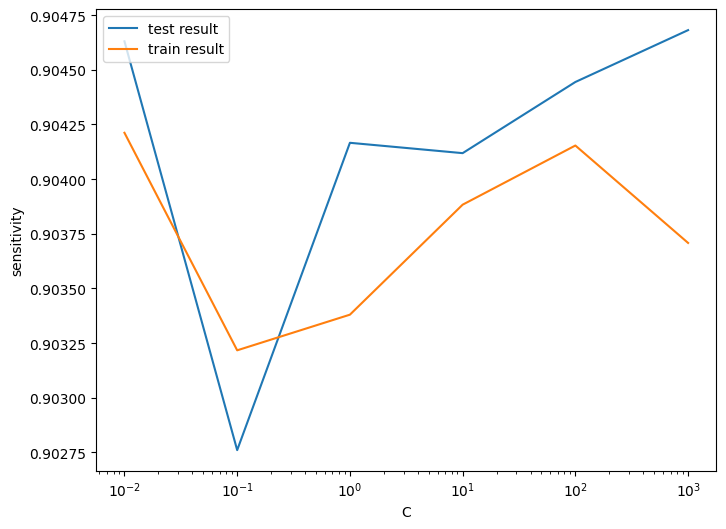

In [63]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

plt.show()

In [64]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(f"The highest test sensitivity is {best_score} at C = {best_C}")

The highest test sensitivity is 0.9046816261110792 at C = 1000


### Logistic Regression with optimal C

In [65]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16556  4804]
 [ 2035 19325]]


In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
print("Prediction performance on train data")
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Prediction performance on train data
Accuracy:- 0.8399110486891386
Sensitivity:- 0.9047284644194756
Specificity:- 0.7750936329588015


In [68]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4071 1262]
 [  31  177]]


In [69]:
print("Prediction performance on test data")
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Prediction performance on test data
Accuracy:- 0.7666486193827828
Sensitivity:- 0.9047284644194756
Specificity:- 0.7750936329588015


**`Model Summary`**
* Train set
    * Accuracy : 0.84
    * Sensitivity : 0.90
    * Specificity : 0.76
* Test set
    * Accuracy : 0.77
    * Sensitivity : 0.90
    * Specificity : 0.78

<br>
* Overall, the model is applying what it had learned from the train set well in the test set and is giving good performance.

## SVM (Support Vector Machine) with PCA

In [70]:
# Importing SVC
from sklearn.svm import SVC

### Hyperparamenter Tuning : C

* C : Regularization Parameter
* gamma : Handles non linear classifications.

In [72]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = model, 
                        param_distributions = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

**Plotting the accuracy with various values of C and gamma.**

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

In [ ]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

**Deduction**
* The plot above shows that the model becomes overfit when the gamma number increases. Both train and test accuracy are nearly identical with the smallest gamma value (0.0001).
* Additionally, the test and train results are similar when C=100, and our accuracy is high.
* Even though Sklearn advises choosing the optimal scores mentioned above (gamma=0.01, C=1000), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is done in order to establish the recommended values based on the typical test accuracy. (but not considering subjective parameters such as model complexity).
* We can also achieve a comparable average test accuracy with gamma=0.0001, but it will cost us more money C. Obtaining good accuracy necessitates making a trade-off between:
    * High gamma, which translates to high nonlinearity, and a C average value
    * A high value of C and a low gamma (i.e., less non-linearity)
* We claim that the model will be more straightforward if it contains the least amount of nonlinearity, thus we pick gamma=0.0001 and a high C=100.

### SVM with optimal hyperparameter

In [ ]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

In [ ]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

**`Model Summary`**
* Train set
    * Accuracy : 0.89
    * Sensitivity : 0.92
    * Specificity : 0.85
* Test set
    * Accuracy : 0.85
    * Sensitivity : 0.81
    * Specificity : 0.85

## Decision Trees with PCA

In [ ]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

### Hyperparameter Tuning

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = RandomizedSearchCV(estimator = dtree, 
                           param_distributions = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

### Decision Tree Model with optimal Hyperparameter

In [ ]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

In [ ]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

**``Model summary``**

* Train set
    * Accuracy = 0.90
    * Sensitivity = 0.91
    * Specificity = 0.88
* Test set
    * Accuracy = 0.86
    * Sensitivity = 0.70
    * Specificity = 0.87

<br>
The model's performance shows that the sensitivity declined when it was being assessed on the test set. The test set's precision and specificity, however, are fairly high.

## Random Forest with PCA

In [ ]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter Tuning

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf, 
                           param_distributions = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

### Random Forest model with Optimal hyperparameters

In [ ]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [ ]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

In [ ]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

**``Model summary``**

* Train set
    * Accuracy = 0.84
    * Sensitivity = 0.88
    * Specificity = 0.80
* Test set
    * Accuracy = 0.80
    * Sensitivity = 0.75
    * Specificity = 0.80

<br>
The model's performance shows us that, while assessing the model on the test set, the sensitivity has dropped. On the other hand, the test set's precision and specificity are fairly high.

## Inference for Models with PCA

After experimenting with several models, we can observe that the conventional Logistic regression or the SVM models perform well for achieving the best sensitivity, which was our final goal. The sensitivity for both models was around 81%. Also, we have good accuracy—roughly 85%.

## Logistic Regression with RFE selected Features

In [70]:
##### Importing stats model
import statsmodels.api as sm

In [71]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

# Fit the model
log_no_pca = log_no_pca.fit().summary()

# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42720
Model:                            GLM   Df Residuals:                    42589
Model Family:                Binomial   Df Model:                          130
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 11 Mar 2023   Deviance:                       24790.
Time:                        10:50:45   Pearson chi2:                 4.01e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.8122      0.078     23.294      0.000       1.660       1.965
loc_og_t2o_mou       -9.539e-06      0.001     -0.016      0.988      -0.001       0.001
std_og_t2o_mou       -8.426e-06      0.001     -0.016      0.988      -0.001       0.001
loc_ic_t2o_mou       -5.336e-06      0.000     -0.016      0.988      -0.001       0.001
arpu_6                   0.0005      0.000      2.332      0.020    8.21e-05       0.001
arpu_7                   0.0005      0.000      2.189      0.029    4.97e-05       0.001
arpu_8                   0.0003      0.000      1.287      0.198      -0.000       0.001
onnet_mou_6              0.0544      0.007      7.417      0.000       0.040       0.069
onnet_mou_7              0.0024      0.004      0.612      0.540      -0.005       0.010
onnet_mou_8              0.0020      0.004      0.506      0.613      -0.006       0.010
offnet_mou_6             0.0556      0.007      7.567      0.000       0.041       0.070
offnet_mou_7             0.0070      0.004      1.794      0.073      -0.001       0.015
offnet_mou_8            -0.0071      0.004     -1.805      0.071      -0.015       0.001
roam_ic_mou_6            0.0021      0.000      5.730      0.000       0.001       0.003
roam_ic_mou_7           -0.0007      0.000     -1.472      0.141      -0.002       0.000
roam_ic_mou_8            0.0019      0.000      4.613      0.000       0.001       0.003
roam_og_mou_6           -0.0561      0.007     -7.627      0.000      -0.070      -0.042
roam_og_mou_7           -0.0043      0.004     -1.095      0.274      -0.012       0.003
roam_og_mou_8            0.0062      0.004      1.584      0.113      -0.001       0.014
loc_og_t2t_mou_6       -19.0022      3.390     -5.606      0.000     -25.646     -12.359
loc_og_t2t_mou_7       -14.7941      3.363     -4.400      0.000     -21.385      -8.204
loc_og_t2t_mou_8        33.7111      3.462      9.738      0.000      26.926      40.496
loc_og_t2m_mou_6       -19.0041      3.390     -5.607      0.000     -25.648     -12.361
loc_og_t2m_mou_7       -14.8013      3.363     -4.402      0.000     -21.392      -8.211
loc_og_t2m_mou_8        33.7223      3.462      9.741      0.000      26.937      40.507
loc_og_t2f_mou_6       -18.9934      3.390     -5.603      0.000     -25.637     -12.350
loc_og_t2f_mou_7       -14.8036      3.363     -4.402      0.000     -21.395      -8.213
loc_og_t2f_mou_8        33.7141      3.462      9.738      0.000      26.928      40.500
loc_og_t2c_mou_6        -0.0023      0.003     -0.880      0.379      -0.008       0.003
loc_og_t2c_mou_7        -0.0007      0.003     -0.223      0.823      -0.007       0.005
loc_og_t2c_mou_8         0.0008      0.004      0.231      0.817      -0.006       0.008
loc_og_mou_6             8.1465      4.122      1.977    

**Model evaluation**
* It is clear that not many features have positive coefficients, and not many have negative ones.
* Because of their increased p-values, many features lost their significance in the model.

**Tuning in coarse (Auto+Manual)**

Recursive Feature Elimination (RFE) will be used to first remove a few features, and once we have a manageable number of variables, manual feature removal can be used (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection using RFE

In [72]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

### RFE with 15 columns

In [73]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, step = 15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [74]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'total_ic_mou_6', 'total_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_

In [75]:
#selecting the top 15 features
rfe_cols = ['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8',
       'monthly_2g_8', 'monthly_3g_8', 'vbc_action_drop']

### Model - 1 with RFE selected features

In [76]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42720
Model:                            GLM   Df Residuals:                    42704
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 11 Mar 2023   Deviance:                       31562.
Time:                        10:50:57   Pearson chi2:                 3.15e+05
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.5553      0.027     56.604      0.000       1.501       1.609
offnet_mou_7         0.0012   5.27e-05     21.853      0.000       0.001       0.001
offnet_mou_8        -0.0034      0.000    -23.186      0.000      -0.004      -0.003
roam_og_mou_8        0.0071      0.000     33.134      0.000       0.007       0.008
std_og_t2m_mou_8     0.0024      0.000     16.119      0.000       0.002       0.003
isd_og_mou_8        -0.0270      0.005     -5.807      0.000      -0.036      -0.018
og_others_7         -0.9377      0.592     -1.585      0.113      -2.097       0.222
og_others_8      -1754.6796   1.41e+05     -0.012      0.990   -2.78e+05    2.74e+05
loc_ic_t2f_mou_8    -0.0218      0.002    -10.510      0.000      -0.026      -0.018
loc_ic_mou_8        -0.0102      0.000    -43.933      0.000      -0.011      -0.010
std_ic_t2f_mou_8    -0.0336      0.004     -7.752      0.000      -0.042      -0.025
ic_others_8         -0.2350      0.018    -13.298      0.000      -0.270      -0.200
total_rech_num_8    -0.0611      0.002    -28.431      0.000      -0.065      -0.057
monthly_2g_8        -3.3822      0.161    -20.948      0.000      -3.699      -3.066
monthly_3g_8        -2.6644      0.114    -23.280      0.000      -2.889      -2.440
vbc_action_drop     -0.2773      0.018    -15.619      0.000      -0.312      -0.243
====================================================================================
"""

**Checking VIFs**

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,10.62
3,std_og_t2m_mou_8,7.01
0,offnet_mou_7,2.91
8,loc_ic_mou_8,2.13
11,total_rech_num_8,1.88
7,loc_ic_t2f_mou_8,1.29
2,roam_og_mou_8,1.28
13,monthly_3g_8,1.10
12,monthly_2g_8,1.09
14,vbc_action_drop,1.08


**Dedution**
* Removing column og_others_8, which has the greatest p-value (0.99) and is therefore not significant.

In [79]:
# Removing og_others_8 column 
log_cols = rfe_cols
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8', 'vbc_action_drop']


### Model - 2 after removing feature og_others_8

In [80]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42720
Model:                            GLM   Df Residuals:                    42705
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15817.
Date:                Sat, 11 Mar 2023   Deviance:                       31634.
Time:                        10:50:59   Pearson chi2:                 3.11e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4758
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.5556      0.027     56.691      0.000       1.502       1.609
offnet_mou_7         0.0011   5.26e-05     21.825      0.000       0.001       0.001
offnet_mou_8        -0.0034      0.000    -23.257      0.000      -0.004      -0.003
roam_og_mou_8        0.0071      0.000     33.251      0.000       0.007       0.008
std_og_t2m_mou_8     0.0024      0.000     16.179      0.000       0.002       0.003
isd_og_mou_8        -0.0279      0.005     -5.939      0.000      -0.037      -0.019
og_others_7         -1.3756      0.546     -2.520      0.012      -2.446      -0.306
loc_ic_t2f_mou_8    -0.0218      0.002    -10.516      0.000      -0.026      -0.018
loc_ic_mou_8        -0.0102      0.000    -43.933      0.000      -0.011      -0.010
std_ic_t2f_mou_8    -0.0343      0.004     -7.874      0.000      -0.043      -0.026
ic_others_8         -0.2348      0.018    -13.286      0.000      -0.269      -0.200
total_rech_num_8    -0.0614      0.002    -28.599      0.000      -0.066      -0.057
monthly_2g_8        -3.4017      0.163    -20.916      0.000      -3.720      -3.083
monthly_3g_8        -2.6607      0.114    -23.261      0.000      -2.885      -2.436
vbc_action_drop     -0.2777      0.018    -15.649      0.000      -0.312      -0.243
====================================================================================
"""

**Checking VIF**

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,10.62
3,std_og_t2m_mou_8,7.00
0,offnet_mou_7,2.91
7,loc_ic_mou_8,2.13
10,total_rech_num_8,1.88
6,loc_ic_t2f_mou_8,1.29
2,roam_og_mou_8,1.28
12,monthly_3g_8,1.10
11,monthly_2g_8,1.09
13,vbc_action_drop,1.08


**Deduction**
* All of the variables' p-values are significant, as can be seen from the model summary, and the *offnet_mou_8* column has the greatest VIF (10.62). as a result, remove the *offnet_mou_8*.

In [82]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

### Model - 3 after removing feature offnet_mou_8 (final model)

In [83]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42720
Model:                            GLM   Df Residuals:                    42706
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16132.
Date:                Sat, 11 Mar 2023   Deviance:                       32264.
Time:                        10:51:00   Pearson chi2:                 1.36e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4680
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.5695      0.027     57.872      0.000       1.516       1.623
offnet_mou_7         0.0008   4.62e-05     16.659      0.000       0.001       0.001
roam_og_mou_8        0.0055      0.000     27.426      0.000       0.005       0.006
std_og_t2m_mou_8    -0.0007   5.94e-05    -11.149      0.000      -0.001      -0.001
isd_og_mou_8        -0.0342      0.005     -6.893      0.000      -0.044      -0.024
og_others_7         -1.6503      0.579     -2.851      0.004      -2.785      -0.516
loc_ic_t2f_mou_8    -0.0212      0.002    -10.053      0.000      -0.025      -0.017
loc_ic_mou_8        -0.0126      0.000    -58.508      0.000      -0.013      -0.012
std_ic_t2f_mou_8    -0.0384      0.004     -8.699      0.000      -0.047      -0.030
ic_others_8         -0.2329      0.017    -13.457      0.000      -0.267      -0.199
total_rech_num_8    -0.0614      0.002    -28.940      0.000      -0.066      -0.057
monthly_2g_8        -3.4354      0.164    -20.941      0.000      -3.757      -3.114
monthly_3g_8        -2.7932      0.117    -23.882      0.000      -3.022      -2.564
vbc_action_drop     -0.2826      0.018    -16.047      0.000      -0.317      -0.248
====================================================================================
"""

**Checking VIF**

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_7,2.54
2,std_og_t2m_mou_8,2.14
9,total_rech_num_8,1.84
6,loc_ic_mou_8,1.72
5,loc_ic_t2f_mou_8,1.29
1,roam_og_mou_8,1.18
10,monthly_2g_8,1.09
11,monthly_3g_8,1.09
12,vbc_action_drop,1.07
7,std_ic_t2f_mou_8,1.03


**Deduction**
* We can see that all of the variables are significant at this point and that there is no multicollinearity among the variables from the model summary and the VIF list.
* Hence, it follows that the final model will be *Model-3 : log_no_pca_3*.

### Model Evaluation

In [85]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    3.245724e-01
1    8.360302e-02
2    9.170402e-02
3    2.709516e-03
4    2.425610e-23
dtype: float64

**Creating a dataframe with the actual churn and the predicted probabilities**

In [86]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,3.245724e-01,0
1,0,8.360302e-02,1
2,0,9.170402e-02,2
3,0,2.709516e-03,3
4,0,2.425610e-23,4


**Finding Optimal Probability Cut-off point**

In [87]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,3.245724e-01,0,1,1,1,1,0,0,0,0,0,0
1,0,8.360302e-02,1,1,0,0,0,0,0,0,0,0,0
2,0,9.170402e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,2.709516e-03,3,1,0,0,0,0,0,0,0,0,0
4,0,2.425610e-23,4,1,0,0,0,0,0,0,0,0,0


**Calculate accuracy, sensitivity and specificity for various probability cut-offs**

In [88]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.744031     0.982818     0.505243
0.2          0.2  0.779775     0.962968     0.596582
0.3          0.3  0.804471     0.943727     0.665215
0.4          0.4  0.823525     0.921348     0.725702
0.5          0.5  0.839045     0.893446     0.784644
0.6          0.6  0.844944     0.844663     0.845225
0.7          0.7  0.831718     0.760721     0.902715
0.8          0.8  0.792556     0.634504     0.950609
0.9          0.9  0.583099     0.180946     0.985253


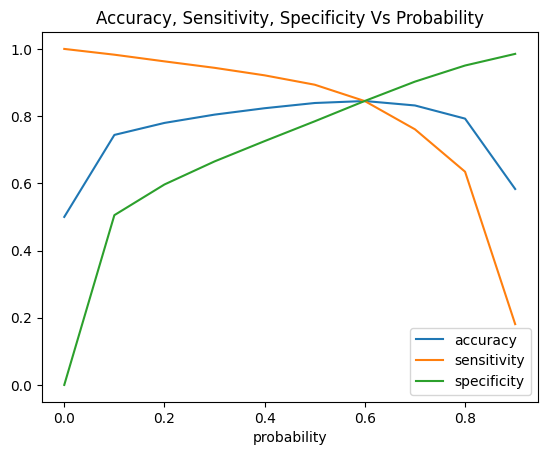

In [89]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.title('Accuracy, Sensitivity, Specificity Vs Probability')
plt.show()

**Deduction**
* Accuracy - Becomes stable around 0.6
* Sensitivity - Decreases with the increased probablity.
* Specificity - Increases with the increasing probablity.

<br>

* We can see that there is an accurate balance between sensitivity and specificity at ``0.6``, where the three parameters intersect.

* Here, sensitivity is more important than accuracy and specificity to us. Although 0.6 should be the ideal probability cutoff according to the above curve, we are using ``0.5`` in order to get increased sensitivity, which is our primary objective.

In [90]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,3.245724e-01,0,1,1,1,1,0,0,0,0,0,0,0
1,0,8.360302e-02,1,1,0,0,0,0,0,0,0,0,0,0
2,0,9.170402e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,2.709516e-03,3,1,0,0,0,0,0,0,0,0,0,0
4,0,2.425610e-23,4,1,0,0,0,0,0,0,0,0,0,0


### Metrics

In [91]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[16760  4600]
 [ 2276 19084]]
Accuracy:- 0.8390449438202248
Sensitivity:- 0.9047284644194756
Specificity:- 0.7750936329588015


**Deduction**
* For the train set prediction, we have good accuracy, sensitivity, and specificity.

### Plotting ROC Curve

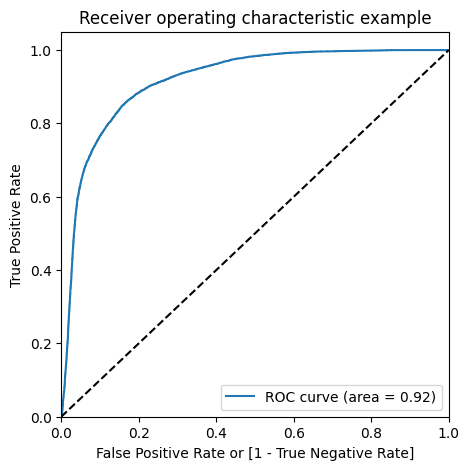

In [92]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

**Deduction**
* We can observe that the ROC curve's area is closer to 1 than it is to the model's Gini coefficient.

### Testing the model on the test data

In [93]:
# Taking a copy of the test set
X_test_log = X_test.copy()

# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

**Predictions on the test data using final model**

In [94]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

y_test_pred.head()

5704     0.040761
64892    0.001069
39613    0.520580
93118    0.025284
81235    0.030025
dtype: float64

In [95]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.040761
64892,0.001069
39613,0.520580
93118,0.025284
81235,0.030025


In [96]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [97]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

# Rearranging the columns
y_test_pred_final = y_test_pred_final[['CustID','churn','churn_prob']]

# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [98]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,5704,0,0.040761,0
1,64892,0,0.001069,0
2,39613,0,0.520580,1
3,93118,0,0.025284,0
4,81235,0,0.030025,0


**Metrics**

In [99]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[4150 1183]
 [  36  172]]
Accuracy:- 0.7800036094567767
Sensitivity:- 0.9047284644194756
Specificity:- 0.7750936329588015


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.90
    - Specificity = 0.77
- Test set
    - Accuracy = 0.78
    - Sensitivity = 0.90
    - Specificity = 0.78
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

## Inference on models with NO PCA

We can see that the logistic model's precision and sensitivity are good and comparable to those of the models that include PCA. Therefore, we can choose this model over a more complicated one because logistic regression with PCA explains the important predictor factors as well as the relevance of each variable. The model helps us identify the factors that need to be taken into account when choosing which clients to lose. The model is therefore more appropriate for educating the company.

# Business impact and recommendations

**Top features driving the churn & non-churn**

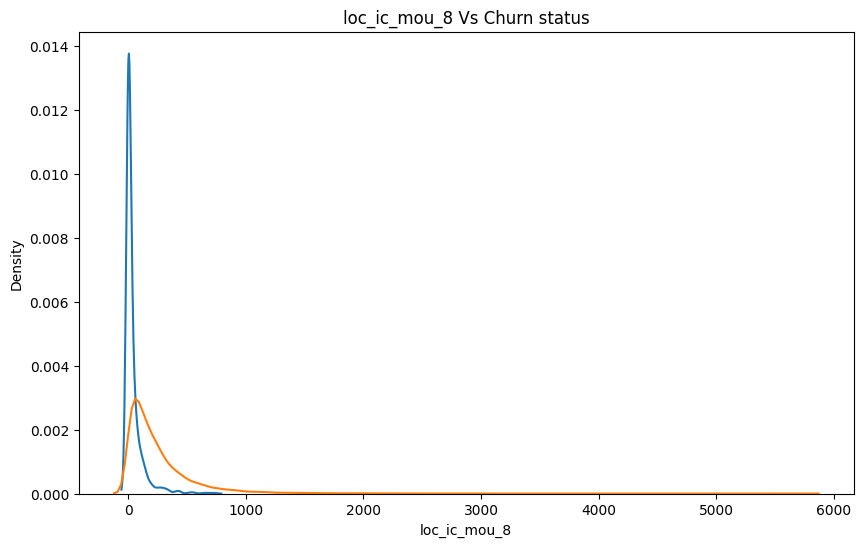

In [103]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(raw_data8[raw_data8['churn']==1]['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(raw_data8[raw_data8['churn']==0]['loc_ic_mou_8'],label='not churn',hist=False)
plt.title('loc_ic_mou_8 Vs Churn status')
plt.show()

**Deduction**
* We can see that the minutes of consumption for the churn customers throughout the month of August are typically lower than those for non-churn customers.

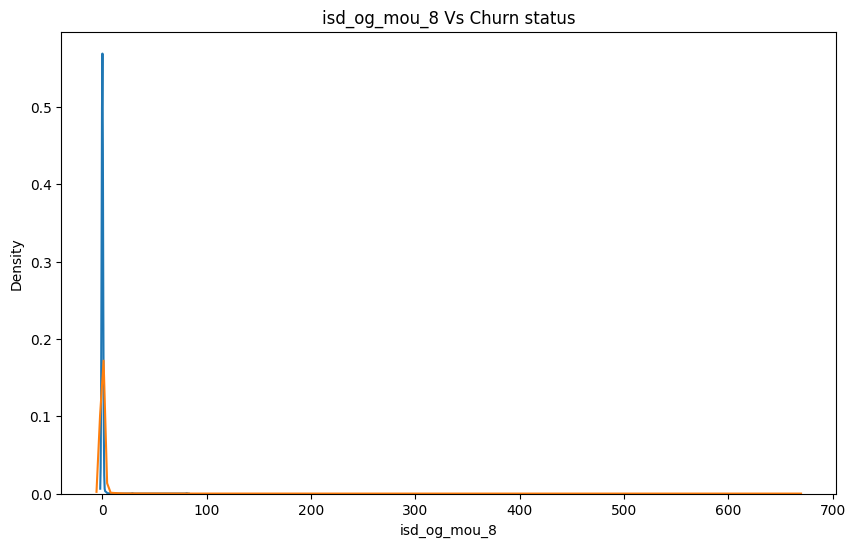

In [104]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(raw_data8[raw_data8['churn']==1]['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(raw_data8[raw_data8['churn']==0]['isd_og_mou_8'],label='not churn',hist=False)
plt.title('isd_og_mou_8 Vs Churn status')
plt.show()

**Deduction**
* We can observe that for churn clients, the ISD outbound minutes of consumption for the month of August had nearly reached zero.
On the other side, it isn't much more than the churn customers for the non-churn consumers. 

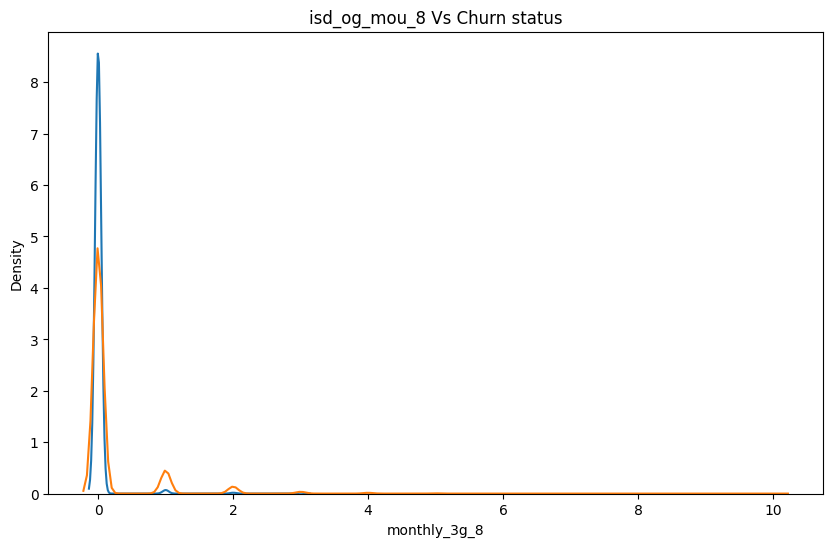

In [105]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(raw_data8[raw_data8['churn']==1]['monthly_3g_8'],label='churn',hist=False)
sns.distplot(raw_data8[raw_data8['churn']==0]['monthly_3g_8'],label='not churn',hist=False)
plt.title('isd_og_mou_8 Vs Churn status')
plt.show()

**Deduction**
* For August, the amount of monthly 3G data for customers who churn is fairly densely populated at around 1, but it is spread out across different values for customers who don't churn.

* We may also plot the churn distribution for each variable that has greater coefficients. 

The top variables chosen for the logistic regression model are listed below. 

| Variables   | Coefficients |
|---------------------|--------------|
|loc_ic_mou_8|-3.3287|
|og_others_7|-2.4711|
|ic_others_8|-1.5131|
|isd_og_mou_8|-1.3811|
|decrease_vbc_action|-1.3293|
|monthly_3g_8|-1.0943|
|std_ic_t2f_mou_8|-0.9503|
|monthly_2g_8|-0.9279|
|loc_ic_t2f_mou_8|-0.7102|
|roam_og_mou_8|0.7135|

* The majority of the top variables, as can be seen, have negative coefficients.
This indicates that the factors and the probability of churn have an inverse relationship.

<br>
E.g : -
<br>
The likelihood that a client will leave increases if their local inbound minutes of usage (loc ic mou 8) are lower in August than in any other month.

**`Business Recommendations`**
1. Focus on clients who use fewer minutes for inbound local calls and outgoing ISD calls during the action phase (mostly in the month of August).
2. Pay special attention to the clients who pay more in July than they do in August.
3. In addition, clients that experience increasing value-based costs throughout the action phase are more likely to leave than other customers. So, making an offer to these customers may be a good idea.
4. Customers have a greater chance to be churned if their monthly 3G recharge is higher in August.
5. Customers who used fewer STD incoming minutes on fixed T lines from operators T in August are more likely to churn.
6. Customers who use less 2G data each month in August are more likely to churn.
7. Consumers who used less incoming minutes on fixed T lines from operators in August are more likely to leave.
8. Variables in roam og mou 8 have positive coefficients (0.7135). That means for the clients, whose roaming outbound minutes of consumption is increasing are more likely to churn.